In [2]:
# Install RDKit, tensorflow , and other dependencies
!pip install tensorflow rdkit-pypi pandas


# This installs:

# RDKit: To handle SMILES and molecular structures.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 58.7 MB/s eta 0:00:00


In [3]:
# upload a file sample_drugs.smi

from google.colab import files
uploaded = files.upload()

Saving chembl_22_clean_1576904_sorted_std_final.smi to chembl_22_clean_1576904_sorted_std_final.smi


In [4]:
# Read and Print the First 10 Records

# Read the .smi file and print the first 10 SMILES strings
with open("chembl_22_clean_1576904_sorted_std_final.smi", "r") as file:
    # Read all lines from the file
    smiles_list = [line.strip() for line in file]

    # Print the first 10 records
    print("First 10 records from the .smi file:")
    for i, smiles in enumerate(smiles_list[:10]):
        print(f"{i+1}: {smiles}")

First 10 records from the .smi file:
1: CCO	CHEMBL545
2: C	CHEMBL17564
3: CO	CHEMBL14688
4: NCCS	CHEMBL602
5: NCCN	CHEMBL816
6: CN	CHEMBL43280
7: C=O	CHEMBL1255
8: CCN	CHEMBL14449
9: CSC	CHEMBL15580
10: CBr	CHEMBL48339


In [5]:
import pandas as pd

# Read the .smi file into a list
with open("chembl_22_clean_1576904_sorted_std_final.smi", "r") as file:
    smiles_list = [line.strip() for line in file]

# Create a pandas DataFrame
df = pd.DataFrame(smiles_list[:10], columns=["SMILES"])

# Add an index column for the table
df.index += 1

# Display the DataFrame as a table
print(df)


              SMILES
1     CCO\tCHEMBL545
2     C\tCHEMBL17564
3    CO\tCHEMBL14688
4    NCCS\tCHEMBL602
5    NCCN\tCHEMBL816
6    CN\tCHEMBL43280
7    C=O\tCHEMBL1255
8   CCN\tCHEMBL14449
9   CSC\tCHEMBL15580
10  CBr\tCHEMBL48339


In [6]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

# Read the uploaded ChEMBL .smi file
smiles_file = "chembl_22_clean_1576904_sorted_std_final.smi"
with open(smiles_file, "r") as file:
    smiles_list = [line.strip() for line in file]

# Function to calculate molecular weight and LogP using RDKit
def calculate_features(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mol_weight = Descriptors.MolWt(mol)  # Molecular Weight
        log_p = Descriptors.MolLogP(mol)     # LogP (Octanol-Water Partition Coefficient)
        return mol_weight, log_p
    else:
        return None, None

# Prepare data for the first 10 records
data = []
for i, smiles in enumerate(smiles_list[:10]):  # Limit to the first 10 entries
    mol_weight, log_p = calculate_features(smiles)
    data.append({
        "ID": i+1,                 # ID column (1 to 10)
        "SMILES": smiles,           # SMILES string
        "Molecular Weight (MW)": mol_weight,  # Molecular Weight
        "LogP": log_p               # LogP value
    })

# Create a pandas DataFrame from the data
df = pd.DataFrame(data)

# Display the table with all columns
print(df)


   ID            SMILES  Molecular Weight (MW)    LogP
0   1    CCO\tCHEMBL545                 46.069 -0.0014
1   2    C\tCHEMBL17564                 16.043  0.6361
2   3   CO\tCHEMBL14688                 32.042 -0.3915
3   4   NCCS\tCHEMBL602                 77.152 -0.1251
4   5   NCCN\tCHEMBL816                 60.100 -1.0962
5   6   CN\tCHEMBL43280                 31.058 -0.4251
6   7   C=O\tCHEMBL1255                 30.026 -0.1849
7   8  CCN\tCHEMBL14449                 45.085 -0.0350
8   9  CSC\tCHEMBL15580                 62.137  0.9792
9  10  CBr\tCHEMBL48339                 94.939  1.0111


# Interpretation of LogP Values:

*  LogP < 0: More hydrophilic; likely to dissolve better in water.
*  LogP ≈ 0: Balanced hydrophilicity and lipophilicity.
*  LogP > 0: More lipophilic; likely to dissolve better in lipids or organic solvents.


# Importance of Molecular Weight in Drug Manufacturing:

## Drug Design and Selection:

Drug Design and Selection:

* Drug-Likeness: Compounds with an optimal MW (usually less than 500 Da) are often considered more "drug-like" and are more likely to exhibit good pharmacokinetic properties.

* Target Binding: MW can influence how well a drug binds to its target, as larger molecules may fit better into specific binding sites.

Solubility and Stability:

* Solubility: Lower MW compounds typically have higher solubility, which is essential for absorption in the gastrointestinal tract. Solubility affects bioavailability—the fraction of the drug that enters circulation.

* Chemical Stability: MW can impact the stability of a drug in various formulations (e.g., tablets, solutions) and under different conditions (e.g., temperature, pH).

Pharmacokinetics:

* Absorption: Smaller molecules can often penetrate biological membranes more easily than larger ones, affecting how well a drug is absorbed.

* Distribution: MW influences how a drug distributes throughout the body. Larger molecules may be confined to the bloodstream, while smaller ones can distribute more widely into tissues.

* Excretion: MW affects renal clearance. Larger molecules may be eliminated more slowly, while smaller ones can be filtered and excreted by the kidneys.

Formulation Development:

* Dosage Form Design: The molecular weight influences how a drug is formulated. For example, high MW compounds may require specific formulation strategies to enhance solubility and stability.

* Delivery Methods: MW can dictate the method of delivery (oral, intravenous, subcutaneous, etc.) based on how the drug behaves in the body.

Regulatory Considerations:

* Compliance: Regulatory agencies often have guidelines regarding the MW of drugs in development, influencing the approval process.






In [7]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import numpy as np

# Load the SMILES dataset
smiles_file = "chembl_22_clean_1576904_sorted_std_final.smi"  # Make sure the file is uploaded
with open(smiles_file, "r") as file:
    smiles_list = [line.strip() for line in file]

# Function to calculate features
def calculate_features(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None, None
    mol_weight = Descriptors.MolWt(mol)
    log_p = Descriptors.MolLogP(mol)
    return mol_weight, log_p

# Create a DataFrame to hold the data
data = []
for smiles in smiles_list:
    mw, logp = calculate_features(smiles)
    if mw is not None:  # Only include valid entries
        data.append((smiles, mw, logp))

df = pd.DataFrame(data, columns=["SMILES", "Molecular Weight (MW)", "LogP"])

# Check the DataFrame
print(df.head())

# Key Points

# SMILES Format: SMILES is a way to encode the structure of a chemical compound in a text string, which is compact and human-readable.
# Molecule Object: The Mol object serves as a foundation for various cheminformatics operations.
# Error Handling: It's important to handle cases where the input SMILES might be invalid to avoid runtime errors.


[11:13:30] Explicit valence for atom # 1 N, 6, is greater than permitted
[11:13:31] Explicit valence for atom # 3 O, 3, is greater than permitted
[11:13:31] Explicit valence for atom # 3 O, 3, is greater than permitted
[11:13:31] Explicit valence for atom # 4 O, 3, is greater than permitted
[11:13:31] Explicit valence for atom # 3 O, 3, is greater than permitted
[11:13:32] Explicit valence for atom # 3 O, 3, is greater than permitted
[11:13:32] Explicit valence for atom # 5 O, 3, is greater than permitted
[11:13:32] Explicit valence for atom # 5 O, 3, is greater than permitted
[11:13:32] Explicit valence for atom # 4 O, 3, is greater than permitted
[11:13:32] Explicit valence for atom # 4 O, 3, is greater than permitted
[11:13:33] Explicit valence for atom # 4 O, 3, is greater than permitted
[11:13:34] Explicit valence for atom # 5 O, 3, is greater than permitted
[11:13:36] Explicit valence for atom # 5 O, 3, is greater than permitted
[11:13:36] Explicit valence for atom # 8 O, 3, is g

            SMILES  Molecular Weight (MW)    LogP
0   CCO\tCHEMBL545                 46.069 -0.0014
1   C\tCHEMBL17564                 16.043  0.6361
2  CO\tCHEMBL14688                 32.042 -0.3915
3  NCCS\tCHEMBL602                 77.152 -0.1251
4  NCCN\tCHEMBL816                 60.100 -1.0962


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to encode SMILES strings (basic character frequency)
def encode_smiles(smiles):
    # Create a dictionary for characters
    unique_chars = sorted(set(''.join(smiles_list)))
    char_to_int = {c: i for i, c in enumerate(unique_chars)}

    # Encode each SMILES string
    encoded = np.zeros((len(smiles), len(unique_chars)))
    for i, s in enumerate(smiles):
        for char in s:
            encoded[i, char_to_int[char]] += 1
    return encoded

# Encode the SMILES strings
X = encode_smiles(df['SMILES'])
y = df[['Molecular Weight (MW)', 'LogP']].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the output features
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train)


In [9]:
import tensorflow as tf

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)  # Two outputs: MW and LogP
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train_scaled, epochs=100, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
31515/31515 ━━━━━━━━━━━━━━━━━━━━ 72s 2ms/step - loss: 0.1084 - val_loss: 0.0486
Epoch 2/100
31515/31515 ━━━━━━━━━━━━━━━━━━━━ 73s 2ms/step - loss: 0.0521 - val_loss: 0.0446
Epoch 3/100
31515/31515 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 0.0479 - val_loss: 0.0445
Epoch 4/100
31515/31515 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 0.0462 - val_loss: 0.0447
Epoch 5/100
31515/31515 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - loss: 0.0464 - val_loss: 0.0449
Epoch 6/100
31515/31515 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 0.0455 - val_loss: 0.0600
Epoch 7/100
31515/31515 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 0.0451 - val_loss: 0.0440
Epoch 8/100
31515/31515 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - loss: 0.0442 - val_loss: 0.0433
Epoch 9/100
31515/31515 ━━━━━━━━━━━━━━━━━━━━ 82s 2ms/step - loss: 0.0444 - val_loss: 0.0433
Epoch 10/100
31515/31515 ━━━━━━━━━━━━━━━━━━━━ 72s 2ms/step - loss: 0.0437 - val_loss: 0.0488
Epoch 11/100
31515/31515 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - loss: 0.0440 - val

In [10]:
# Evaluate the model
test_loss = model.evaluate(X_test, scaler.transform(y_test))
print(f"Test Loss: {test_loss}")

9849/9849 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 0.0411
Test Loss: 0.041249074041843414


In [11]:
# Make predictions
predictions = model.predict(X_test)
predictions_unscaled = scaler.inverse_transform(predictions)

# Display some predictions
for i in range(5):
    print(f"Predicted: MW={predictions_unscaled[i][0]}, LogP={predictions_unscaled[i][1]}, Actual: MW={y_test[i][0]}, LogP={y_test[i][1]}")


9849/9849 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step
Predicted: MW=314.9903869628906, LogP=2.9518866539001465, Actual: MW=316.79600000000005, LogP=2.8913200000000003
Predicted: MW=395.2970886230469, LogP=3.888578176498413, Actual: MW=394.30200000000013, LogP=3.841300000000002
Predicted: MW=1499.316650390625, LogP=1.7577543258666992, Actual: MW=1510.849, LogP=0.7310999999999849
Predicted: MW=528.6502075195312, LogP=-3.151876449584961, Actual: MW=536.2760000000003, LogP=-4.154599999999995
Predicted: MW=408.2519836425781, LogP=4.261662483215332, Actual: MW=406.5110000000001, LogP=4.934900000000003


* LogP < 0: More hydrophilic; likely to dissolve better in water.
* LogP ≈ 0: Balanced hydrophilicity and lipophilicity.
* LogP > 0: More lipophilic; likely to dissolve better in lipids or organic solvents.

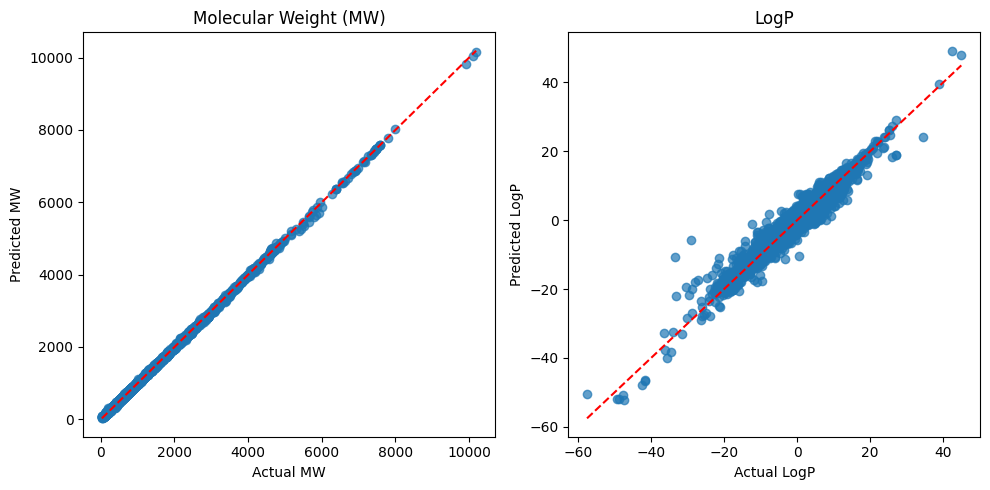

In [12]:
import matplotlib.pyplot as plt

# Plot Predicted vs Actual MW
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test[:, 0], predictions_unscaled[:, 0], alpha=0.7)
plt.plot([min(y_test[:, 0]), max(y_test[:, 0])], [min(y_test[:, 0]), max(y_test[:, 0])], 'r--')
plt.title("Molecular Weight (MW)")
plt.xlabel("Actual MW")
plt.ylabel("Predicted MW")

# Plot Predicted vs Actual LogP
plt.subplot(1, 2, 2)
plt.scatter(y_test[:, 1], predictions_unscaled[:, 1], alpha=0.7)
plt.plot([min(y_test[:, 1]), max(y_test[:, 1])], [min(y_test[:, 1]), max(y_test[:, 1])], 'r--')
plt.title("LogP")
plt.xlabel("Actual LogP")
plt.ylabel("Predicted LogP")

plt.tight_layout()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

# Assuming you have your full dataset in `X` and `y`, and SMILES in `df['SMILES']`
X_train, X_test, y_train, y_test, X_train_indices, X_test_indices = train_test_split(
    X, y, df.index, test_size=0.2, random_state=42)

# Make predictions
predictions = model.predict(X_test)
predictions_unscaled = scaler.inverse_transform(predictions)

# Extract the predicted LogP values (second column)
predicted_logp = predictions_unscaled[:, 1]

# Classify based on LogP
def classify_logp(logp):
    if logp < 0:
        return "More hydrophilic (better in water)"
    elif abs(logp) < 0.5:  # Near zero, small tolerance for "balanced"
        return "Balanced hydrophilicity and lipophilicity"
    else:
        return "More lipophilic (better in lipids/organic solvents)"

# Apply the classification to each predicted LogP value
logp_classification = [classify_logp(logp) for logp in predicted_logp]

# Create a DataFrame to show SMILES, predicted LogP, and classification
result_df = pd.DataFrame({
    "SMILES": df['SMILES'].iloc[X_test_indices],
    "Predicted LogP": predicted_logp,
    "Classification": logp_classification
})

# Display the first few results
print(result_df.head(10))

# Optional: Count the number of molecules in each category
classification_counts = result_df['Classification'].value_counts()
print("\nClassification Summary:")
print(classification_counts)


9849/9849 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
                                                    SMILES  Predicted LogP  \
404408   CN(C)Cc1nc2nc(C)cc(Nc3ccc(Cl)cc3)n2n1\tCHEMBL1...        2.951887   
708729   CCN(CC(=O)NCc1ccc(Cl)cc1)C(=O)NCc1ccc(Cl)cc1\t...        3.888578   
1564164  CC(C)NCc1ccc(CC2NC(=O)C(Cc3ccc4ccccc4c3)NC(=O)...        1.757754   
1338841  OCC1OC(OP(O)(=O)OP(O)(=O)OCC2OC(C(O)C2O)N2C=CC...       -3.151876   
735356   CCNc1cc(NS(C)(=O)=O)ccc1Nc1c2ccccc2nc2ccccc12\...        4.261662   
411602   Cc1nccn1-c1nc(NC2CCOCC2)nc(C)c1N(=O)=O\tCHEMBL...        0.425267   
652262   CC(=C)C1CC(CCC1(C)C=C)C(=C)COC(=O)CCC(O)=O\tCH...        3.604239   
36884               CC1(C)C(C(=O)NCCO)C1(C)C\tCHEMBL189344        1.553918   
1503385  CC(C)(C)OC(=O)NC(Cc1ccccc1)C(O)CC(Cc1ccccc1)C(...        2.626107   
1550957  OCC1OC(OCCC2(CCC(COC(=O)C(=Cc3ccc(O)c(O)c3)C(=...        2.261378   

                                            Classification  
404408   More lipophilic (better in 

In [19]:
import pandas as pd

# Assuming you have more SMILES data in 'new_smiles_data'
new_smiles_data = ["CN(C)Cc1nc2nc(C)cc(Nc3ccc(Cl)cc3)n2n1",
                   "CCN(CC(=O)NCc1ccc(Cl)cc1)C(=O)NCc1ccc(Cl)cc1",
                   # Add more SMILES strings here
                  ]

# Tokenize the new SMILES strings
new_encodings = tokenizer(new_smiles_data, truncation=True, padding=True, max_length=128)

# Create a TensorFlow Dataset from the tokenized SMILES
new_dataset = tf.data.Dataset.from_tensor_slices(dict(new_encodings)).batch(16)

# Predict new LogP values using the fine-tuned model
new_predictions = model.predict(new_dataset)

# Convert predictions to labels
predicted_logp = tf.argmax(new_predictions.logits, axis=1)

# Add the new SMILES and predicted LogP values to a DataFrame
new_predictions_df = pd.DataFrame({'SMILES': new_smiles_data, 'Predicted LogP': predicted_logp.numpy()})


1/1 [==============================] - 13s 13s/step


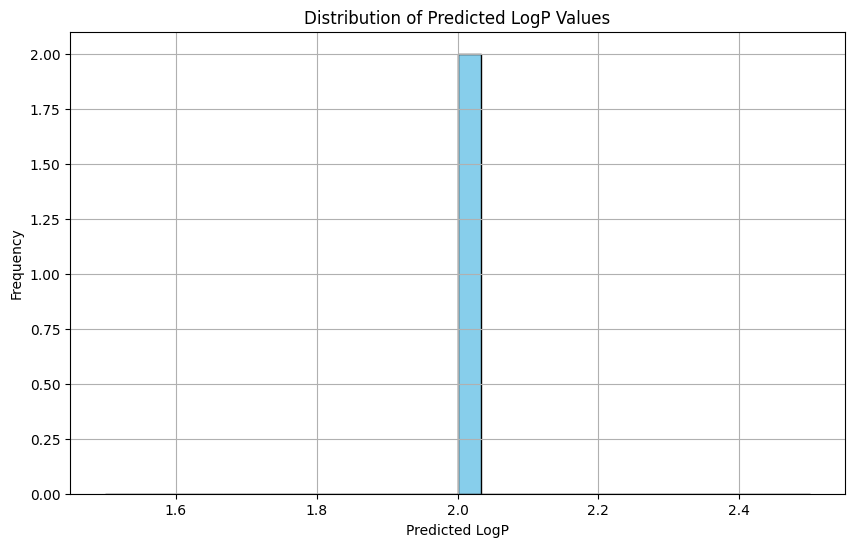

In [20]:
import matplotlib.pyplot as plt

# Histogram of predicted LogP values
plt.figure(figsize=(10,6))
plt.hist(new_predictions_df['Predicted LogP'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted LogP Values')
plt.xlabel('Predicted LogP')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


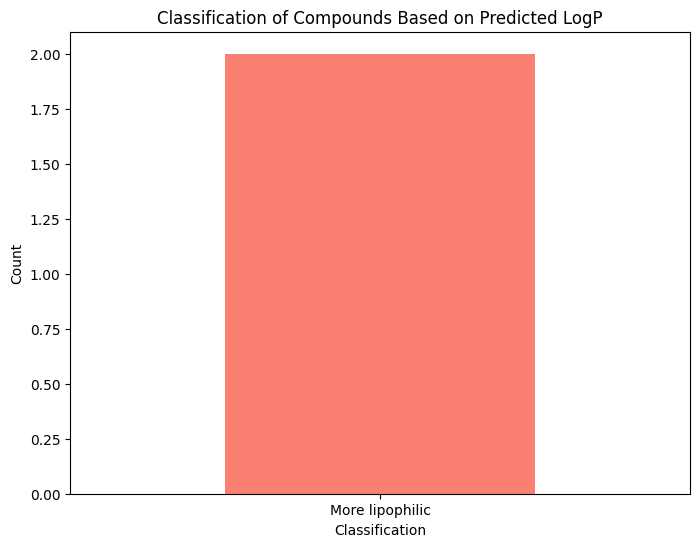

In [21]:
# Classify the predicted LogP values
def classify_logp(logp):
    if logp < 0:
        return "More hydrophilic"
    elif logp > 0:
        return "More lipophilic"
    else:
        return "Balanced"

new_predictions_df['Classification'] = new_predictions_df['Predicted LogP'].apply(classify_logp)

# Bar chart showing the count of each classification
classification_summary = new_predictions_df['Classification'].value_counts()

plt.figure(figsize=(8,6))
classification_summary.plot(kind='bar', color='salmon')
plt.title('Classification of Compounds Based on Predicted LogP')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
